In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = make_blobs(n_samples=1000,
                  centers=7,
                  n_features=2, 
                  random_state=42)

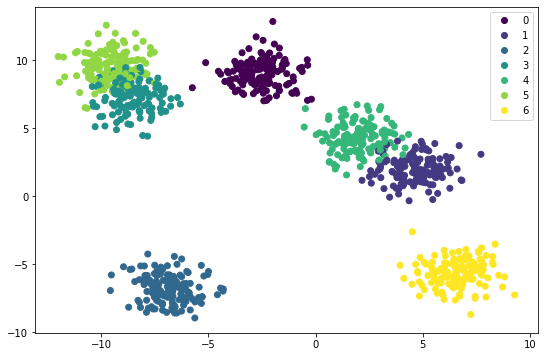

In [3]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=set(y));

In [4]:
X_bin, y_bin = X[(y==1)|(y==4)], y[(y==1)|(y==4)] == 1

In [5]:
X_bin.shape

(286, 2)

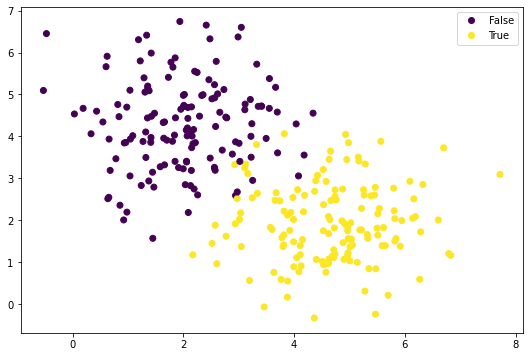

In [6]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X_bin[:,0], X_bin[:,1], c=y_bin)
plt.legend(handles=scatter.legend_elements()[0], labels=set(y_bin));

In [180]:
import numpy as np

def binary_classification_metrics(pred, true):
    '''
    pred and true - bool arrays
    precision, recall, f1, accuracy - classification metrics
    '''
    TP = 0  # Should be positive and is positive
    FP = 0 # Should be negative and is positive
    TN = 0 # Should be negative and is negative
    FN = 0 # Should be positive and is negative
    
    for i in range(len(pred)):
        if pred[i]:
            if true[i]:
                TP += 1
            else:
                FP +=1
        elif not pred[i]:
            if not true[i]:
                TN += 1
            else:
                FN += 1

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy = (TP+TN)/(TP+FN+TN+FP) # В тесте почему-то accuracy 0.5, получилось 0.4, проверила в sklearn.metrics accuracy_score
    f1 = (2*precision*recall)/(precision+recall)
    
    return precision, recall, f1, accuracy
   


def multiclass_accuracy(pred, true):
    '''
    accuracy - ratio of accurate predictions to total samples
    '''
    amnt = len(pred)
    c = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            c += 1
    accuracy = c/amnt
    return accuracy
            

In [181]:
# TEST
assert binary_classification_metrics(
                [True, False, True, True, False],
                [True, True, False, True, True]) == (0.6666666666666666, 0.5, 0.5714285714285715, 0.4)

In [182]:
# TEST
assert multiclass_accuracy([1,4,6,1,5,1,2],
                           [1,4,2,3,5,2,2]) == 0.5714285714285714

In [456]:
from collections import Counter
from scipy.stats import mode
# TODO: реализовать класс KNN
# Метод fit запоминает обучающую выборку
# Метод predict должен рассчитать попарные расстояния между примерами в x и x_train (calc_dist),
# а затем выбрать топ-к метку для каждого примера (k_closest_labels)


class KNN:
    """
    K-neariest-neighbor classifier using L1 loss
    """
    def __init__(self, k=1):
        self.k = k

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y
    
    def predict(self, x):
        assert len(x.shape) == 2 and x.shape[1] == self.x_train.shape[1]
        dists = np.array([self.calc_dist(x, x_tr) for x_tr in x])
        labels = self.k_closest_labels(dists)
        
        return np.array(labels)
    
    def calc_dist(self, a, b):
        dists = np.zeros((a.shape[0], b.shape[0]))
        #dists = [float(sum(np.abs(v1-v2) for v1, v2 in zip(a[0],b[0])))] # L1 (manhattan)
        for i in range(a.shape[0]):
            for ind in range(b.shape[0]):
                dists[i][ind] = np.sum(np.abs(a[i]-b[ind]))
        return dists
    
    
    def k_closest_labels(self, dists):
        a = dists.shape[0]
        labels = np.zeros(dists.shape[0])
        
        for i in range(a):
            k_closest_n = []
            idx = np.argsort(dists[i])[:self.k]
            k_closest_n = self.y_train[idx].flatten()
            c = Counter(k_closest_n)
            labels[i] = c.most_common(1)[0][0]
        print(labels)
            
           
        return labels
            
        
        
        
        
        
       
        

In [457]:
import scipy
from scipy.spatial import distance

In [458]:
# TEST KNN.calc_dist
# should be [[42]]
a, b = np.array([[13, 39]]), np.array([[24, 8]])
assert KNN().calc_dist(a, b) == scipy.spatial.distance.cdist(a, b, 'cityblock') 

In [459]:
a, b = np.array([[13, 39]]), np.array([[24, 8]])

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [455]:
assert binary_classification_metrics(y_pred, y_test) == (0.9387755102040817, 0.92, 0.9292929292929293, 0.9263157894736842)

ZeroDivisionError: division by zero

In [69]:
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [70]:
assert multiclass_accuracy(y_pred, y_test) == 0.9545454545454546

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()